<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
import os
import copy
import pickle
import typing
import itertools
import functools
import heapq
import operator
import collections
from glob import glob, iglob

import numpy as np
import pandas as pd
import scipy

from tqdm import tqdm_notebook
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
class __RollingWindowIterator:
    def __init__(self, iterable: typing.Iterable, window_size: int, rolling_step: int) -> type(None):
        if not 1 <= rolling_step <= window_size:
            raise IndexError("'rolling_step' should not be greater than 'size' or lower that 1")

        self.it = iter(iterable)
        self.rolling_step = rolling_step
        self.window_size = window_size

        self.buffered_it = None
        self.i = 0

    def __next__(self) -> typing.Iterator:
        if self.i == self.rolling_step:
            self.buffered_it = copy.copy(self.it)
        if self.i != self.window_size:
            self.i += 1
        else:
            self.i = 1
            self.it = self.buffered_it
        return next(self.it)

    def __iter__(self) -> '__RollingWindowIterator':
        return self


def split_to_equally_sized(sequence: typing.Sequence,
                           size: int,
                           rolling_step: typing.Optional[int] = None,
                           padvalue: typing.Any = None) -> typing.Iterable[typing.Sequence]:
    """
    Splits an iterable type to equally sized tuples, and if the last chunk appears to be incomplete,
    pads it with the value specified.

    Examples:
    1)  list(split_to_equally_sized(['a', 'b', 'c', 'd', 'e', 'f', 'g'], 3, padvalue='padval'))
        >>> [('a', None, 42443), (-1, 'e', 'f'), ('g', 'padval', 'padval')]
    2)  list(split_to_equally_sized(['a', None, 42443, -1, 'e', 'f', 'g'], 4, 2, 'padval'))
        >>> [('a', None, 42443, -1),
             (42443, -1, 'e', 'f'),
             ('e', 'f', 'g', 'padval'),
             ('g', 'padval', 'padval', 'padval')]

    Args:
        iterable:      any iterable you want to split
        size:          chunk size
        rolling_step:  chunk start shift step. Should be >= 1 and <= 'size'. See the second example for clarity.

                       If not specified, the chunks do not intersect,
                       and the behavior is equal to the case where 'rolling_step' equals to 'size'.

                       --- Attention! ---
                       Specifying this parameter greatly slows down the function.
                       For example:
                       1)  list(split_to_equally_sized(iterable, size, padvalue=padvalue))
                       2)  list(split_to_equally_sized(iterable, size, size - 1, padvalue=padvalue))
                       Although the result is nearly the same, the second option is about 100 times slower.

        padvalue:      padding value to fill incomplete chunks
                       (that exist if the total number of iterations of 'iterable' is not divisible by 'size')
    Returns:
        itertools.zip_longest generator (that can later be calculated on the fly)
    """

    iterator = (iter(sequence) if not rolling_step or rolling_step == size
                else __RollingWindowIterator(sequence, size, rolling_step))

    return itertools.zip_longest(*((iterator,) * size), fillvalue=padvalue)

In [3]:
def __read_user_csv(file_name_and_user_ID: typing.Tuple[str, int]) -> pd.DataFrame:
    file_name, user_id = file_name_and_user_ID
    df = pd.read_csv(file_name)
    df.index = np.repeat(user_id, df.shape[0])
    return df


def construct_csr_matrix(session_matrix: typing.Iterable[typing.Iterable[int]]) -> scipy.sparse.csr.csr_matrix:
    site_counts, session_IDs, site_IDs = zip(
        *(
            (site_count, session_ID, site_ID - 1)
            for session_ID, site_counts_for_session in enumerate(map(collections.Counter, session_matrix))
            for site_ID, site_count in site_counts_for_session.items()
            if site_ID != 0
        )
    )
    return csr_matrix((site_counts, (session_IDs, site_IDs)))


__user_info_dict = typing.Mapping[str, typing.Tuple[int, int]]
__return_type = typing.Tuple[scipy.sparse.csr.csr_matrix, typing.Sequence[int]]


def prepare_sparse_train_set_window(path_to_csv_files: str,
                                    site_freq_path: str,
                                    session_length: int = 10,
                                    window_size: int = 10) -> __return_type:
    with open(site_freq_path, 'rb') as dump_file:
        site_name_to_ID_and_freq = pickle.load(dump_file)

    site_name_to_ID = pd.Series(
        index=site_name_to_ID_and_freq.keys(),
        data=next(zip(*site_name_to_ID_and_freq.values()))
    )

    __user_csvs_and_IDs = sorted(
        map(lambda x: (x, int(x.split('/')[-1][4:-4])), iglob(os.path.join(path_to_csv_files, '*.csv'))),
        key=lambda x: x[1]
    )
    user_history = pd.concat(map(__read_user_csv, __user_csvs_and_IDs))
    user_history = pd.Series(
        index=user_history.index,
        data=site_name_to_ID[user_history['site']].values
    )

    user_ID_for_session = []
    def callback(session_history: typing.Sequence[int], user_ID: int) -> typing.Sequence[int]:
        """
        Returns the history sequence for the current session,
        storing the corresponding user_ID in the 'user_ID_for_session'
        """
        user_ID_for_session.append(user_ID)
        return session_history

    session_histories = (
        callback(session_history, user_ID)
        for _, user_ID in __user_csvs_and_IDs
        for session_history in split_to_equally_sized(
            user_history[user_ID].values,
            session_length,
            window_size,
            padvalue=0
        )
    )

    return construct_csr_matrix(session_histories), np.array(user_ID_for_session)

In [4]:
PATH_TO_DATA = 'Data/Raw/'
PATH_TO_PICKLED = 'Data/Pickled/'
PATH_TO_MERGED = 'Data/Merged/'
PATH_TO_ANSWERS = 'Answers/'

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [5]:
%%time
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(
    os.path.join(PATH_TO_DATA, '3users'), 
    os.path.join(PATH_TO_PICKLED, 'site_freq_3users.pkl'),
    session_length=5,
    window_size=3
)

CPU times: user 11 ms, sys: 1.73 ms, total: 12.8 ms
Wall time: 11.8 ms


In [6]:
X_toy_s5_w3.todense()

matrix([[0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0],
        [3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [7]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [8]:
%%time

data_lengths = []

def __filtering_rule(x: typing.Tuple[int, int, int]) -> bool:
    (_, window_size, session_length) = x
    return window_size <= session_length and (window_size != 10 or session_length != 10)


for num_users, window_size, session_length in filter(__filtering_rule,
                                                     itertools.product([10, 150], [10, 7, 5], [15, 10, 7, 5])):
    X_sparse, y = prepare_sparse_train_set_window(
        os.path.join(PATH_TO_DATA, f'{num_users}users'), 
        os.path.join(PATH_TO_PICKLED, f'site_freq_{num_users}users.pkl'),
        session_length=session_length,
        window_size=window_size
    )
    data_lengths.append(len(y))
    with open(os.path.join(PATH_TO_PICKLED,
                           f'X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl'), 'wb') as out:
        pickle.dump(X_sparse, out)
    with open(os.path.join(PATH_TO_PICKLED,
                           f'y_{num_users}users_s{session_length}_w{window_size}.pkl'), 'wb') as out:
        pickle.dump(y, out)

CPU times: user 51.4 s, sys: 2.05 s, total: 53.5 s
Wall time: 53.5 s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [9]:
unique = str(len(set(data_lengths)))
print(unique)

6


In [10]:
with open(PATH_TO_ANSWERS + 'week2_1.txt', 'w') as out:
    out.write(' '.join(map(str, data_lengths)))

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [11]:
train_df = pd.read_csv(os.path.join(PATH_TO_MERGED, 'train_data_10users.csv'), index_col=0)

In [12]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,193,576,134,3,134,134,3,134,203,134,31
1,415,192,697,254,134,31,393,4575,218,55,31
2,55,3,55,55,5,294,415,333,917,55,31
3,482,3568,482,55,55,55,55,1005,201,124,31
4,346,55,5,4382,261,212,3727,2450,675,2450,31


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [14]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [15]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [16]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

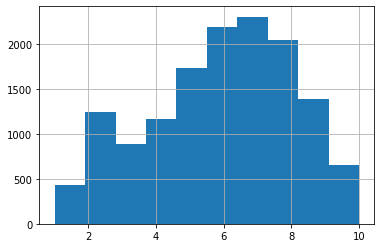

In [17]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

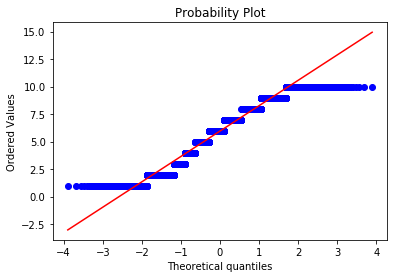

In [18]:
stats.probplot(num_unique_sites, dist='norm', plot=plt)
plt.show()

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [19]:
insignificant = stats.shapiro(num_unique_sites)[1] > .05
f'Гипотеза о нормальности {"не " if insignificant else ""}отвергается'

/Users/andrewsonin/.programs/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


'Гипотеза о нормальности отвергается'

In [20]:
with open(PATH_TO_ANSWERS + 'week2_2.txt', 'w') as out:
    out.write('YES' if insignificant else 'NO')

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [21]:
has_two_similar = np.array(num_unique_sites) < 10
pval = stats.binom_test(has_two_similar.sum(), len(has_two_similar), p=0.95, alternative='greater')
pval

0.02207653769072678

In [22]:
with open(PATH_TO_ANSWERS + 'week2_3.txt', 'w') as out:
    out.write(str(pval))

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [23]:
wilson_interval = proportion_confint(has_two_similar.sum(), len(has_two_similar), method='wilson')

In [24]:
answer = f'{round(wilson_interval[0], 3)} {round(wilson_interval[1], 3)}'
print(answer)

0.95 0.957


In [25]:
with open(PATH_TO_ANSWERS + 'week2_4.txt', 'w') as out:
    out.write(answer)

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

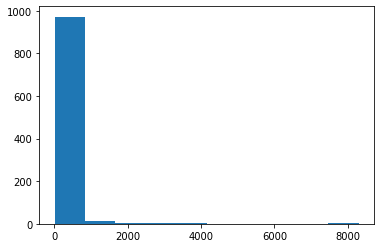

In [26]:
site_freqs = np.unique(train_df.values[:, :-1], return_counts=True)[1][1:1001]
plt.hist(site_freqs)
plt.show()

In [27]:
__site_ids = train_df.values[:, :-1].flatten()
__site_ids = __site_ids[__site_ids != 0]
__site_ids

array([193, 576, 134, ...,   4,  10,  21])

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [28]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [29]:
def stat_intervals(stat, alpha=.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [30]:
with open(os.path.join(PATH_TO_PICKLED, 'site_freq_10users.pkl'), 'rb') as pkl:
    freqs = pickle.load(pkl)
_, freqs = zip(*freqs.values())
del _
freqs = np.array(freqs)
freqs

array([8300, 7813, 5441, ...,    1,    1,    1])

In [31]:
samples = get_bootstrap_samples(freqs, len(freqs))
samples.shape

(4913, 4913)

In [32]:
intervals = stat_intervals(np.mean(samples, axis=0))
intervals

array([22.47763078, 35.70286994])

In [33]:
with open(PATH_TO_ANSWERS + 'week2_5.txt', 'w') as out:
    out.write(' '.join(map(lambda x: str(round(x, 3)), intervals)))

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.